## Importing the necessary libraries

In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Data Exploration and Preprocessing

In [14]:
## Load dozzy dataset
df = pd.read_csv('../dozzy_data.csv')

In [5]:
## Check the columns and rows of the data - the shape of the data
df.shape

(300, 12)

In [6]:
## Checking the first 5 data 
df.head(5)

,q1,q2,q3,q4,q5,q6,q7,chronotype,timestamp,id,score_variance,confidence
0,0,2,1,1,0,0,0,Night Owl,2025-03-14 02:08:53,1,0.619048,60.0
1,2,1,1,0,2,3,0,Night Owl,2025-03-14 02:08:53,2,1.238095,60.0
2,1,1,0,0,1,0,0,Night Owl,2025-03-14 02:08:53,3,0.285714,60.0
3,2,0,0,1,0,2,0,Night Owl,2025-03-14 02:08:53,4,0.904762,60.0
4,5,5,4,2,5,4,4,Morning Lark,2025-03-14 02:08:53,5,1.142857,60.0


In [7]:
## Checking the datatypes making sure that every data is clear
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   q1              300 non-null    int64  
 1   q2              300 non-null    int64  
 2   q3              300 non-null    int64  
 3   q4              300 non-null    int64  
 4   q5              300 non-null    int64  
 5   q6              300 non-null    int64  
 6   q7              300 non-null    int64  
 7   chronotype      300 non-null    object 
 8   timestamp       300 non-null    object 
 9   id              300 non-null    int64  
 10  score_variance  300 non-null    float64
 11  confidence      300 non-null    float64
dtypes: float64(2), int64(8), object(2)
memory usage: 28.2+ KB


In [23]:
## Identify the data.. - categorical(target values - y) and numerical data(X)
## Dependent and Independent variable

X = df.iloc[:, :7]
y = df.iloc[:, -2]

y.head()

0    1
1    1
2    1
3    1
4    0
Name: chronotype, dtype: int64

In [9]:
## Checking the missing values
df.isnull().sum()

q1                0
q2                0
q3                0
q4                0
q5                0
q6                0
q7                0
chronotype        0
timestamp         0
id                0
score_variance    0
confidence        0
dtype: int64

In [27]:
df.corr()

,q1,q2,q3,q4,q5,q6,q7,chronotype,confidence
q1,1.000000,0.793944,0.799620,0.698160,0.812079,0.749185,0.780435,-0.885238,0.080960
q2,0.793944,1.000000,0.790090,0.721386,0.811504,0.749620,0.769643,-0.889222,0.047023
q3,0.799620,0.790090,1.000000,0.719074,0.806085,0.763822,0.776655,-0.894908,0.059792
q4,0.698160,0.721386,0.719074,1.000000,0.718680,0.655455,0.701915,-0.798636,0.015555
q5,0.812079,0.811504,0.806085,0.718680,1.000000,0.783337,0.816937,-0.910045,0.066226
q6,0.749185,0.749620,0.763822,0.655455,0.783337,1.000000,0.747692,-0.853470,-0.007093
q7,0.780435,0.769643,0.776655,0.701915,0.816937,0.747692,1.000000,-0.873248,0.113332
chronotype,-0.885238,-0.889222,-0.894908,-0.798636,-0.910045,-0.853470,-0.873248,1.000000,-0.079682
confidence,0.080960,0.047023,0.059792,0.015555,0.066226,-0.007093,0.113332,-0.079682,1.000000


Text(0, 0.5, 'chronotype')

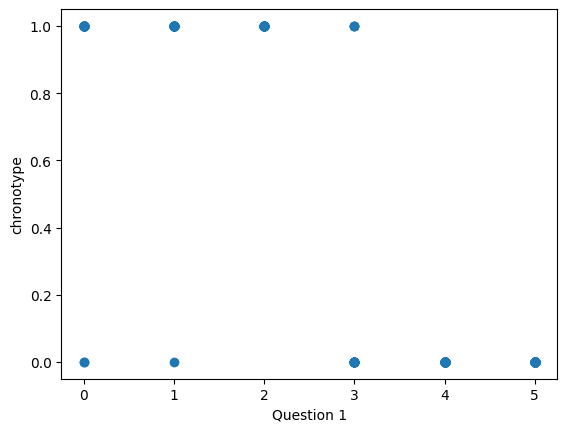

In [28]:
plt.scatter(df["q1"], df["chronotype"])
plt.xlabel("Question 1")
plt.ylabel("chronotype")

## Feature Engineering

In [15]:
## Normaize the chronotype column(Morning Lark/Night Owl)) and convert it into numerical format

df['chronotype'] = df['chronotype'].map({'Morning Lark': 0, 'Night Owl': 1})
print(df)

     q1  q2  q3  q4  q5  q6  q7  chronotype            timestamp   id  \
0     0   2   1   1   0   0   0           1  2025-03-14 02:08:53    1   
1     2   1   1   0   2   3   0           1  2025-03-14 02:08:53    2   
2     1   1   0   0   1   0   0           1  2025-03-14 02:08:53    3   
3     2   0   0   1   0   2   0           1  2025-03-14 02:08:53    4   
4     5   5   4   2   5   4   4           0  2025-03-14 02:08:53    5   
..   ..  ..  ..  ..  ..  ..  ..         ...                  ...  ...   
295   5   3   5   4   4   4   3           0  2025-03-14 02:08:53  296   
296   5   4   5   3   4   4   3           0  2025-03-14 02:08:53  297   
297   0   1   2   0   1   2   2           1  2025-03-14 02:08:53  298   
298   0   1   0   3   1   0   1           1  2025-03-14 02:08:53  299   
299   4   5   5   5   3   5   3           0  2025-03-14 02:08:53  300   

     score_variance  confidence  
0          0.619048        60.0  
1          1.238095        60.0  
2          0.285714  

In [16]:
## dropping the unneccessary fields in the dataset. - Timestamp, Id, Score_variance, ...
df.drop(columns=['timestamp', 'id', 'score_variance'], inplace=True)

In [40]:
## Split the data into train, validation, and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(210, 7)

In [41]:
## Scaling the data to have a good convergence
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [42]:
X_train = scaler.fit_transform(X_train)

In [43]:
X_test = scaler.transform(X_test)

In [49]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [48]:
X_train

array([[-1.59443094, -0.86462939, -1.46595267, ..., -0.42441579,
        -1.4998551 , -0.91143135],
       [-1.59443094, -1.39554218, -0.92869253, ..., -0.42441579,
        -1.4998551 , -0.91143135],
       [ 1.1455895 ,  0.19719618,  0.68308789, ...,  1.27865394,
         0.67234884,  1.23913701],
       ...,
       [ 1.1455895 ,  0.72810896,  1.22034803, ...,  0.14327412,
         0.67234884,  0.70149492],
       [ 0.59758541,  0.19719618,  1.22034803, ...,  0.14327412,
         0.12929785,  0.16385283],
       [-1.59443094, -1.39554218, -1.46595267, ..., -0.9921057 ,
        -0.95680412, -1.44907344]])

## Model Training

In [50]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [51]:
regressor.fit(X_train, y_train)

LogisticRegression()

In [52]:
## Check the coeficients..
print(regressor.coef_)

[[-0.96036366 -0.97737967 -1.01028682 -0.78493734 -0.98713023 -0.84968419
  -0.87635452]]


In [53]:
## Prediction with test data... lets say (X_test)
predictions = regressor.predict(X_test)
predictions

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0])

## Plot analysis

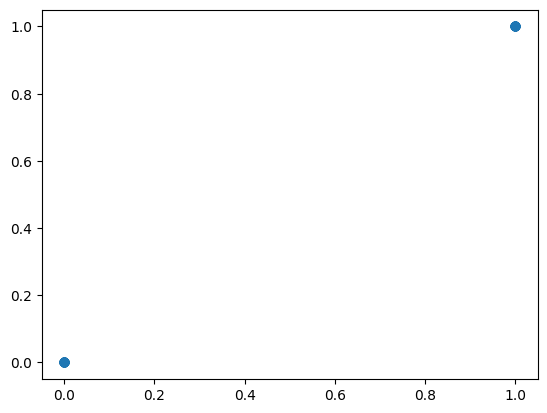

In [54]:
## Compare predictions along with the original values
plt.scatter(y_test, predictions)

In [55]:
## Error - The difference between true value and predicted value
error = y_test - predictions
error

203    0
266    0
152    0
9      0
233    0
      ..
114    0
118    0
72     0
15     0
10     0
Name: chronotype, Length: 90, dtype: int64

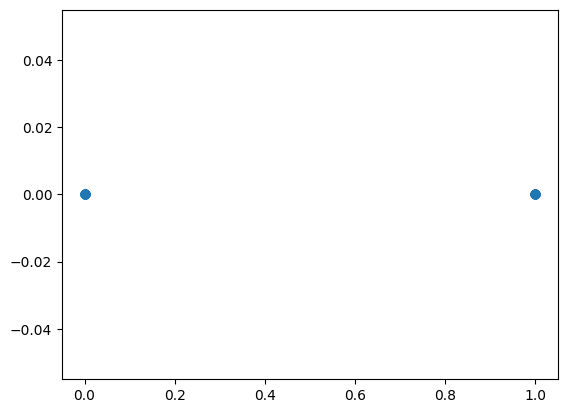

In [56]:
plt.scatter(y_test, error)